# pythagoras

Welcome to _pythagoras_. For more information about the project, visit the [project website](http://web.simmons.edu/~bellanti/pythagoras) or the Github repo.

---


---
# Load libraries and settings
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
import regex as re
from collections import Counter
%matplotlib inline
import sqlite3

---
# XML
---

In [3]:
# xml_filepath = "./scores/xml/JSB_BWV1047_1.xml"
# xml_filepath = "./scores/xml/JSB_BWV1047_2.xml"
# xml_filepath = "./scores/xml/JSB_BWV1047_3.xml"
# xml_filepath = "./scores/xml/JB_op51_no1_2.xml"
# xml_filepath = "./scores/xml/JB_op51_no1_3.xml"
# xml_filepath = "./scores/xml/JB_op51_no1_4.xml"
xml_filepath = "./scores/xml/beethoven-fur_elise.xml"

In [4]:
tree = etree.parse(xml_filepath)
root = tree.getroot()

### Get information about the work

In [5]:
print('\nINSTRUMENTATION:\n')

parts = []

for e in root.xpath('//score-part'):
    part = e.xpath('./@id')[0]
    parts.append(part)
    instr = e.xpath('.//instrument-name')[0].text
    print("\t%s (%s)" % (instr,part))


INSTRUMENTATION:

	Midi_2 (P1)


In [6]:
print('\nKEY & TIME\n')

attrib_list = root.xpath("//part[@id='P1']/measure[@number='1']/attributes/*")

key_dict = {
    '-7':'Cb major (Ab minor)',
    '-6':'Gb major (Eb minor)',
    '-5':'Db major (Bb minor)',
    '-4':'Ab major (F minor)',
    '-3':'Eb major (C minor)',
    '-2':'Bb major (G minor)',
    '-1':'F major (D minor)',
    '0':'C major (A minor)',
    '1':'G major (E minor)',
    '2':'D major (B minor)',
    '3':'A major (F# minor)',
    '4':'E major (C# minor)',
    '5':'B major (G# minor)',
    '6':'F# major (D# minor)',
    '7':'C# major (A# minor)'
}

for e in attrib_list:
    if e.tag == 'key':
        accidentals = e.xpath('./fifths')[0].text
        mode = e.xpath('./mode')[0].text
        key = key_dict[accidentals]
        print("\tKey signature:\t", key)
    if e.tag == 'time':
        beats = e.xpath('./beats')[0].text
        val = e.xpath('./beat-type')[0].text
        time = "%s/%s" % (beats,val)
        print("\tTime signature:\t",time)


KEY & TIME



### Build a dataframe with notes

In [7]:
pitch_dict = {'A0':'1','G##0':'1','Bbb0':'1','A#0':'2','Bb0':'2','Cbb1':'2','B0':'3','Cb1':'3','A##0':'3','C1':'4','B#0':'4','Dbb1':'4','C#1':'5','Db1':'5','B##1':'5','D1':'6','C##1':'6','Dbb1':'6','D#1':'7','Eb1':'7','Fbb1':'7','E1':'8','Fb1':'8','D##1':'8','1':'8','F1':'9','E#1':'9','Gbb1':'9','F#1':'10','Gb1':'10','E##1':'10','G1':'11','F##1':'11','Abb1':'11','G#1':'12','Ab1':'12','A1':'13','G##1':'13','Bbb1':'13','A#1':'14','Bb1':'14','Cbb1':'14','B1':'15','Cb1':'15','A##1':'15','C2':'16','B#2':'16','Dbb2':'16','C#2':'17','Db2':'17','B##2':'17','D2':'18','C##2':'18','Dbb2':'18','D#2':'19','Eb2':'19','Fbb2':'19','E2':'20','Fb2':'20','D##2':'20','2':'20','F2':'21','E#2':'21','Gbb2':'21','F#2':'22','Gb2':'22','E##2':'22','G2':'23','F##2':'23','Abb2':'23','G#2':'24','Ab2':'24','A2':'25','G##2':'25','Bbb2':'25','A#2':'26','Bb2':'26','Cbb2':'26','B2':'27','Cb2':'27','A##2':'27','C3':'28','B#3':'28','Dbb3':'28','C#3':'29','Db3':'29','B##3':'29','D3':'30','C##3':'30','Dbb3':'30','D#3':'31','Eb3':'31','Fbb3':'31','E3':'32','Fb3':'32','D##3':'32','3':'32','F3':'33','E#3':'33','Gbb3':'33','F#3':'34','Gb3':'34','E##3':'34','G3':'35','F##3':'35','Abb3':'35','G#3':'36','Ab3':'36','A3':'37','G##3':'37','Bbb3':'37','A#3':'38','Bb3':'38','Cbb3':'38','B3':'39','Cb3':'39','A##3':'39','C4':'40','B#4':'40','Dbb4':'40','C#4':'41','Db4':'41','B##4':'41','D4':'42','C##4':'42','Dbb4':'42','D#4':'43','Eb4':'43','Fbb4':'43','E4':'44','Fb4':'44','D##4':'44','4':'44','F4':'45','E#4':'45','Gbb4':'45','F#4':'46','Gb4':'46','E##4':'46','G4':'47','F##4':'47','Abb4':'47','G#4':'48','Ab4':'48','A4':'49','G##4':'49','Bbb4':'49','A#4':'50','Bb4':'50','Cbb4':'50','B4':'51','Cb4':'51','A##4':'51','C5':'52','B#5':'52','Dbb5':'52','C#5':'53','Db5':'53','B##5':'53','D5':'54','C##5':'54','Dbb5':'54','D#5':'55','Eb5':'55','Fbb5':'55','E5':'56','Fb5':'56','D##5':'56','5':'56','F5':'57','E#5':'57','Gbb5':'57','F#5':'58','Gb5':'58','E##5':'58','G5':'59','F##5':'59','Abb5':'59','G#5':'60','Ab5':'60','A5':'61','G##5':'61','Bbb5':'61','A#5':'62','Bb5':'62','Cbb5':'62','B5':'63','Cb5':'63','A##5':'63','C6':'64','B#6':'64','Dbb6':'64','C#6':'65','Db6':'65','B##6':'65','D6':'66','C##6':'66','Dbb6':'66','D#6':'67','Eb6':'67','Fbb6':'67','E6':'68','Fb6':'68','D##6':'68','6':'68','F6':'69','E#6':'69','Gbb6':'69','F#6':'70','Gb6':'70','E##6':'70','G6':'71','F##6':'71','Abb6':'71','G#6':'72','Ab6':'72','A6':'73','G##6':'73','Bbb6':'73','A#6':'74','Bb6':'74','Cbb6':'74','B6':'75','Cb6':'75','A##6':'75','C7':'76','B#7':'76','Dbb7':'76','C#7':'77','Db7':'77','B##7':'77','D7':'78','C##7':'78','Dbb7':'78','D#7':'79','Eb7':'79','Fbb7':'79','E7':'80','Fb7':'80','D##7':'80','7':'80','F7':'81','E#7':'81','Gbb7':'81','F#7':'82','Gb7':'82','E##7':'82','G7':'83','F##7':'83','Abb7':'83','G#7':'84','Ab7':'84','A7':'85','G##7':'85','Bbb7':'85','A#7':'86','Bb7':'86','Cbb8':'86','B7':'87','Cb8':'87','A##7':'87','C8':'88','B#7':'88','Dbb8':'88'}

In [8]:
notes = []

for e in root.xpath('//note'):
    
    part = e.xpath('../..//@id')[0]
    
    measure = e.xpath('..//@number')[0]
    
    dotted = True if 'dot' in [child.tag for child in e] else False

    grace = True if 'grace' in [child.tag for child in e] else False

    cue = True if 'cue' in [child.tag for child in e] else False

    rest = True if 'rest' in [child.tag for child in e] else False
    
    duration_list = e.xpath('.//duration/text()')
    duration = duration_list[0] if len(duration_list)>0 else ''
    
    typ_list = e.xpath('.//type/text()')
    typ = typ_list[0] if len(typ_list)>0 else ''

    step_list = e.xpath('.//step/text()')
    step = step_list[0] if len(step_list)>0 else ''
    
    alter_list = e.xpath('.//alter/text()')
    alter = alter_list[0] if len(alter_list)>0 else ''
    if alter == '0':
        accidental = ''
    elif alter == '-1':
        accidental = 'b'
    elif alter == '1':
        accidental = '#'
    elif alter == '-2':
        accidental = 'bb'
    elif alter == '2':
        accidental = '##'
    else:
        accidental = ''

    pitch = step + accidental
    
    octave_list = e.xpath('.//octave/text()')
    octave = octave_list[0] if len(step_list)>0 else ''
    
    notes.append((part,measure,pitch,step,alter,octave,duration,typ,dotted,rest,grace,cue))


---
# Pandas Dataframe
---

In [9]:
df = pd.DataFrame(notes,columns=['part','measure','pitch','step','alter','octave','duration','type','dotted','rest','grace','cue'])

In [10]:
df['keyboard_step'] = df['pitch'] + df['octave']
df['keyboard_step'] = df['keyboard_step'].apply(lambda x: int(pitch_dict[x]) if len(x)>0 else None)

In [11]:
df['interval'] = df['keyboard_step'].diff()

In [12]:
df

,part,measure,pitch,step,alter,octave,duration,type,dotted,rest,grace,cue,keyboard_step,interval
0,P1,0,E,E,,5,120,16th,False,False,False,False,56.0,NaN
1,P1,0,D#,D,1,5,120,16th,False,False,False,False,55.0,-1.0
2,P1,0,,,,,240,eighth,False,True,False,False,NaN,NaN
3,P1,1,E,E,,5,120,16th,False,False,False,False,56.0,NaN
4,P1,1,D#,D,1,5,120,16th,False,False,False,False,55.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,P1,98,A,A,,4,240,eighth,False,False,False,False,49.0,NaN
1111,P1,98,,,,,240,eighth,False,True,False,False,NaN,NaN
1112,P1,98,A,A,,1,240,eighth,False,False,False,False,13.0,NaN
1113,P1,98,A,A,,2,240,eighth,False,False,False,False,25.0,12.0


---
# Vizualizations
---

Text(0.5, 1.0, 'Note types')

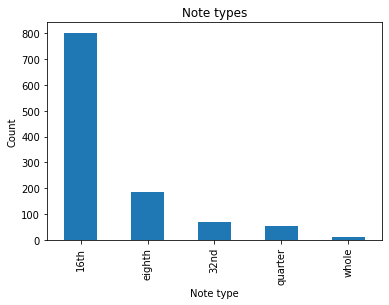

In [13]:
col = 'type'
df[df[col]!=''].groupby(col)[col].count().sort_values(ascending=False).plot.bar()
plt.ylabel('Count')
plt.xlabel('Note type')
plt.title('Note types')

In [14]:
df = df.set_index('part',append=True)

In [15]:
pitch_df = df.groupby('pitch')['pitch'].count()
print(pitch_df)
# table = pd.pivot_table(df, values='pitch', index=[part],columns=['part'], aggfunc=np.unique)
# print(table)
# pd.pivot_table(df, columns='pitch', values='step').plot(subplots=True)
# print(table)

pitch
      210
A     208
B      71
Bb     34
C     105
C#      5
D      68
D#     50
E     228
Eb      2
F      47
F#      3
G      56
G#     28
Name: pitch, dtype: int64



PITCH COUNTS BY PART



/Users/BrandonBel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


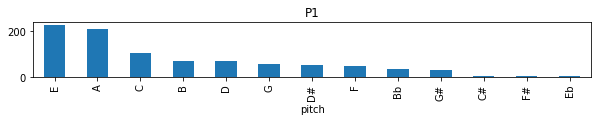

In [16]:
print('\nPITCH COUNTS BY PART\n')

col = 'pitch'
result = df[df[col]!=''].groupby(['part',col])[col].count()
result_df = result.to_frame().rename (columns={col:'count'}).reset_index()
p = len(parts)
if p%2 == 0:
    num_rows = int(p/2)
    fig, ax = plt.subplots(num_rows,2,figsize=(12,num_rows*4))
elif p%3 == 0:
    num_rows = int(p/3)
    fig, ax = plt.subplots(num_rows,3,figsize=(15,num_rows*3))
else:
    num_rows = p
    fig, ax = plt.subplots(num_rows,1,figsize=(10,num_rows))

result_df.pivot(index=col,columns='part',values='count').sort_values(by="P1",ascending=False).plot.bar(subplots=True, ax=ax,legend=False, sharex=False)

plt.tight_layout()
plt.show()




### Pitches

Because this song is written in the key of F, the expected most common pitches are as follows:

* **I chord**: F-A-C
* **IV chord**: Bb-D-F
* **V(7) chord**: C-E-G(-Bb)
* **vi chord**: D-F-A
* **ii chord**: G-Bb-D

Text(0.5, 1.0, 'Pitches')

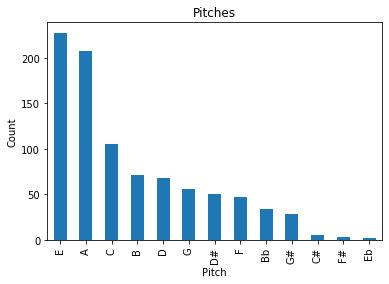

In [17]:
col = 'pitch'
df[df[col]!=''].groupby(col)[col].count().sort_values(ascending=False).plot.bar(subplots=True)
plt.ylabel('Count')
plt.xlabel('Pitch')
plt.title('Pitches')

---
# Patterns
---
Using the string generated from the dataframe series, match any reoccuring patterns longer than a given length.

In [18]:
print(df['pitch'])
print(df.columns)

      part
0     P1       E
1     P1      D#
2     P1        
3     P1       E
4     P1      D#
              ..
1110  P1       A
1111  P1        
1112  P1       A
1113  P1       A
1114  P1        
Name: pitch, Length: 1115, dtype: object
Index(['measure', 'pitch', 'step', 'alter', 'octave', 'duration', 'type',
       'dotted', 'rest', 'grace', 'cue', 'keyboard_step', 'interval'],
      dtype='object')


In [19]:
steps = df['pitch'].to_string(index=False, header=False)
# steps = re.sub(r'\n|\t| ','',steps)
steps = re.sub(r'\n','.',steps)
steps = re.sub(r' ','',steps)


print(steps)

E.D#..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C

In [20]:
# min_length = 8
# min_occur = 2
# pat = r'(?=(.{%d,})).*\1{%d,}' % (min_length, min_occur-1)

# step_patterns = re.findall(pat,steps)

# print(Counter(step_patterns))

In [21]:
# min_length = 5
# min_occur = 8
# pat = r'(?=(.{%d,})(?=.*\1){%d,})' % (min_length, min_occur-1)
# step_patterns = re.findall(pat,steps)
# print(Counter(step_patterns))

In [35]:
min_length = 8
min_occur = 2
pat = r'(.{%d,})(?:.*\1){%d,}' % (min_length, min_occur-1)
# pat = r'(.{%d,})(?:.*\1)' % (min_length)
# pat = r'(.{12,})(?:.*\1)'


step_patterns = re.findall(pat,steps,overlapped=True)

for pattern in step_patterns:
    print(pattern)

E.D#..E.
..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
.E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.
.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#..

In [23]:
min_length = 8
min_occur = 2
pat = r'(.{%d,})(?:.*\1){%d,}' % (min_length, min_occur-1)
# pat = r'(.{%d,})(?:.*\1)' % (min_length)
# pat = r'(.{12,})(?:.*\1)'


# step_patterns = re.finditer(pat,steps,overlapped=True)

# for pat in step_patterns:
#     print(pat.group())
#     print()


E.D#..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.

..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..

.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E

.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B

A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.

.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.

E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D

B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...

G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.

.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E

..C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E

.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D

A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...

..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E..

.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.

.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.

.C.E.A.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..

.A.E.A...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.

...B..E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A.

E.C.B.E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E

E.E.G#...A.A.E.A..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.

..A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.

.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E

.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E

.E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.

.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C.

.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.

.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.

.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...

...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C

.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E

.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...

.B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.

E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.

E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.

#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.

D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A

.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.

E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A

...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E

E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A

#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.

E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.

.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F

..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.

.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.

.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.

B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E

B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A

#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.

.E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.

A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.

..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.

.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.

..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.

.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A

.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D

.B..E.C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#

C.B.E.E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.

E.G#...A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A

.A..B.C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.

C.D.A.E.A...A..E.C.F.C.E.G.C.A.E.A.Bb.C.A.C.G.Bb.C.F.A.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C

.C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.

C.F.E.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.

.F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

F.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

.A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

A.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

.C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

C.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.

.A.C.A.E.D.Bb.A.F.Bb.D.Bb.D.Bb.A.G.F.E.D.C.F.E.F.G.Bb.E.F.G.Bb.E.Bb.A.Bb.A.G.A.Bb.F.A.C.A.C.A.C.D.D#.F.A.C.A.C.A.E.E.F.A.E.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F

.A.C.A.D.D.F.C.D.B.G.E.G.E.G.F.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.E.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D

.C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C.

C.G.G.G.A.G.B.G.C.G.D.G.C.E..F.G.E.G.D.F.G.E.G.C.B.A.G.F.E.D.G.F.D.C.E.G.F.A.G.B.C.G.G.G.A.G.B.G.C.G.D.G.C

.F.E.D#.E.B.E.D#.E.B.E.D#.G#.B...E.B.E.D#..E.B.E...D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.

.E.D#.E.B.E

D#.E...D#...D#.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...

.E...D#.E..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.

B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E

.C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#

E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C.

E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A

.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A..

C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.

.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#.

E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.

D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A..

.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.

A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D

C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.

#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E

C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.

...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.

.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E.

..D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...

.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E

C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.

.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E.

.E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...

E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.

..D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C

.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...

...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.

..D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#

E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E

D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A

C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.

.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..

.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.

G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B.

E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E

...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..


..C.E.A.A.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

.C.E.A.A.E.A...B.

.E.A...B..E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

E.A...B..E.C.B.E.E.G#...A.

.E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

E.C.B.E.E.G#...A...A.A.A.A.A.A.E.G.

.G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.E.G#.B.B.B.B.B.B.C.E.A..C..E.B...E.G#...A.C.E.A.C.E.D.C.B.A..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.A.C.E.A.C.E.D.C.B.A.C.E..A.C.E.Bb.A.G#.G.F#.F.E.D#.D.A.C.E...C#.C.B.Bb.A.G#.G.F#.F..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

G#...A...A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.

A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.

.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.

A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.

.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.G#.D.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A

.F.G#.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb.Bb.Bb.Bb.Bb.D.F.G#.D.

.D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

D.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

.F.A.A.A.A.A.A.A.C.E.A.A.A.A.A.A.F.D.E.C.D.B.D.A.D.A.D.A.D.A.D.A.D.A.C.F#.A.C.A.D#.A.D#.A.D#.A.D#.A.D#.A.D#.A.C.A.E.C.D.B.E.A.E.A.E.A.E.A.E.G#.E.G#.C.A.A.A.A.A.A.A.A.E.G.Bb.C#.A.A.A.A.A

.A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

A.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

.A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

A.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

.A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

A.A.A.A.F.A.D.C#.E.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.

.D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F

D.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

F.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

A.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

A.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

A.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

A.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.A.A.D.F.D.F.A.A.A.A.A.A.D.F.

A.A.D.F.D.F.A.A.A.A.A.A.D.F.

.D.F.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.

.Bb.Bb.Bb.Bb.Bb.Bb.G.Eb.F.D.Eb.C.Bb.Bb.Bb.Bb.Bb.Bb.D.F.Bb.D.F.A.Bb.Bb

..E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

.E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B.

E.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

.E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

E.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.G#...A..

.G#...A..B.C.D.A.E.A...E.G.F.E.C.G.C...D.F.E.D.G.G.B...C.E.D.C.A.E.A...B..E.E...E.E...D#.E...D#.E.D#.E.E.E...E.E...D#.E...D#.E...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.G#.B.E.E.G#...C..E.E.D#.A.E.A...E.D#.E.B.D.C..A..C.E.A.A.E.A...B..E.C.B.E.E.

---
# Database
---
[SQLite3 documentation](https://docs.python.org/3.7/library/sqlite3.html)

In [33]:
import sqlite3
conn = sqlite3.connect('pythagoras.db')

In [34]:
c = conn.cursor()
print(c.execute('''SELECT name from sqlite_master where type="table";''').fetchall())

[('work',), ('pattern',)]


In [30]:
c = conn.cursor()

# Create table
c.execute('''CREATE TABLE pattern
             (pattern_id real, pattern_string text)''')

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()